# 

# Uber - NCR Rides Analysis

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
df = pd.read_csv('/Users/araadhyebisht/Downloads/ncr_ride_bookings.csv')

## Let's explore the data a bit to find some general info about it

In [318]:
df.shape

(150000, 21)

In [319]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [320]:
df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [322]:
df.duplicated().sum()

np.int64(0)

In [323]:
df.sample(10)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
13841,2024-04-15,22:22:03,"""CNR4293605""",Cancelled by Driver,"""CID1443426""",Auto,Arjangarh,Nawada,4.0,NaN,...,NaN,1.0,Personal & Car related issues,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26746,2024-05-03,15:14:31,"""CNR9372796""",No Driver Found,"""CID3455523""",Auto,Jor Bagh,Sarai Kale Khan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126302,2024-06-01,19:03:08,"""CNR7791278""",Completed,"""CID4412419""",Uber XL,Kashmere Gate,Udyog Vihar,13.6,21.8,...,NaN,NaN,NaN,NaN,NaN,349.0,25.03,4.6,4.4,Cash
90823,2024-05-18,17:24:30,"""CNR7266750""",Cancelled by Customer,"""CID5839140""",Auto,Sarai Kale Khan,Sonipat,8.7,NaN,...,Driver asked to cancel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92274,2024-02-04,09:15:27,"""CNR2158990""",Cancelled by Driver,"""CID6841521""",Go Mini,Subhash Chowk,Nehru Place,8.5,NaN,...,NaN,1.0,Personal & Car related issues,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25462,2024-07-20,12:45:36,"""CNR6690503""",Completed,"""CID7244228""",Auto,Dwarka Mor,Govindpuri,2.2,44.4,...,NaN,NaN,NaN,NaN,NaN,219.0,21.00,4.4,4.7,UPI
115468,2024-02-03,17:34:34,"""CNR9050448""",Cancelled by Driver,"""CID3975701""",Auto,Vasant Kunj,Sarai Kale Khan,4.5,NaN,...,NaN,1.0,Customer related issue,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78000,2024-11-06,14:19:15,"""CNR9448877""",Completed,"""CID6591817""",Bike,Panchsheel Park,Indirapuram,11.0,19.1,...,NaN,NaN,NaN,NaN,NaN,827.0,27.25,4.2,4.4,UPI
128570,2024-03-26,12:31:30,"""CNR4675371""",Cancelled by Driver,"""CID9824550""",Bike,Vasant Kunj,GTB Nagar,8.0,NaN,...,NaN,1.0,The customer was coughing/sick,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125543,2024-12-20,07:29:31,"""CNR9683605""",No Driver Found,"""CID2814244""",Premier Sedan,Nirman Vihar,INA Market,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Correlation analysis for Avg CTAT (Customer Turn-Around Time), Avg VTAT (Vehicle Turn-Around Time), Booking Value, Customer Rating and Driver Ratings
### • No significant correlation can be found between Booking Value with either of Avg VTAT or Avg CTAT or of Avg VTAT or Avg CTAT with each other
### • relatively high (still low) correlation between ride distance and average customer turn around time

<Axes: >

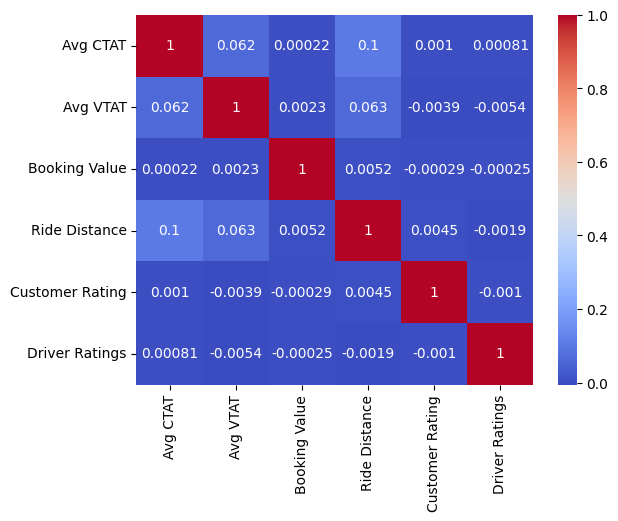

In [324]:
c_map = df[['Avg CTAT', 'Avg VTAT', 'Booking Value', 'Ride Distance', 'Customer Rating', 'Driver Ratings']].corr()
sns.heatmap(c_map, annot=True, cmap='coolwarm')

In [325]:
df['Booking Status'].value_counts()

Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64

### Alot of our 'not completed' rides were due to being cancelled by the driver - we'll look into the why's of it later in the analysis

In [326]:
df_new = df[['Booking Status']].copy()
df_new['percentage'] = (df_new.groupby('Booking Status')['Booking Status'].transform('count') / len(df_new) * 100).round(2)
df_new = df_new.drop_duplicates(subset=['Booking Status']).sort_values('percentage', ascending=False)
df_new

,Booking Status,percentage
2,Completed,62.0
12,Cancelled by Driver,18.0
0,No Driver Found,7.0
18,Cancelled by Customer,7.0
1,Incomplete,6.0


In [327]:
df[df['Booking Status']== 'Completed']['Vehicle Type'].value_counts()

Vehicle Type
Auto             23155
Go Mini          18549
Go Sedan         16676
Bike             14034
Premier Sedan    11252
eBike             6551
Uber XL           2783
Name: count, dtype: int64

### Autos, Go-cabs and bikes are relatively popular among users -- it can be hypotheised that Premier Sedan's perforamnce is relatively lower as it only caters to tier 1-1.5 of ncr while that of eBike and Uber XL can be hypothsised being due to utility reasons 

In [328]:
df_new = df[df['Booking Status']== 'Completed'][['Vehicle Type']].copy()
df_new['percentage'] = (df_new.groupby('Vehicle Type')['Vehicle Type'].transform('count') / len(df_new) * 100).round(2)
df_new = df_new.drop_duplicates().sort_values('percentage', ascending=False)
df_new

,Vehicle Type,percentage
2,Auto,24.90
6,Go Mini,19.95
20,Go Sedan,17.93
4,Bike,15.09
3,Premier Sedan,12.10
38,eBike,7.04
25,Uber XL,2.99


In [329]:
df[df['Booking Status']== 'No Driver Found']['Vehicle Type'].value_counts()

Vehicle Type
Auto             2681
Go Mini          2015
Go Sedan         1960
Bike             1503
Premier Sedan    1280
eBike             746
Uber XL           315
Name: count, dtype: int64

In [ ]:
df_new = df[df['Booking Status']== 'No Driver Found'][['Vehicle Type']].copy()
df_new['percentage'] = (df_new.groupby('Vehicle Type')['Vehicle Type'].transform('count') / len(df_new) * 100).round(2)
df_new = df_new.drop_duplicates().sort_values('percentage', ascending=False)
df_new

,Vehicle Type,percentage
11,Auto,25.53
88,Go Mini,19.19
8,Go Sedan,18.67
114,Bike,14.31
27,Premier Sedan,12.19
0,eBike,7.10
57,Uber XL,3.00


## To check if there is any correlation between a higher Avg Vehicle Turn Around Time and the ride being not completed
### from the direct correlation calculations, nothing significant can be inferred but the box plot does tell us that alot of incompleted rides can be due to the outliers in the Avg VTAT, hence if we can work on reducing these outliers, we'll be able to achieve more successfull rides 

In [76]:
df_new = df[['Avg VTAT','Booking Status']].copy()
df_new['was_not_completed'] = (df_new['Booking Status']!= 'Completed').astype(int)
df_new = df_new.dropna(subset=['Avg VTAT'])
df_new['Avg VTAT'].corr(df_new['was_not_completed']).round(4)

np.float64(-0.0208)

<Axes: xlabel='was_not_completed', ylabel='Avg VTAT'>

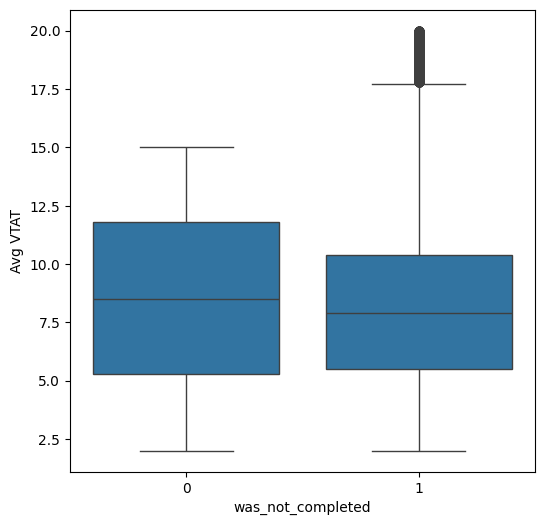

In [77]:
fig = plt.subplots(figsize=(6, 6))
sns.boxplot(data=df_new, x='was_not_completed', y='Avg VTAT')

## We now know that we have the data for the complete 2024 year and hence we can calculate gross booking value for the FY --> ₹ 5,18,46,183

In [331]:
df['Date'].min(), df['Date'].max()

('2024-01-01', '2024-12-30')

In [332]:
df['Booking Value'].sum()

np.float64(51846183.0)

<Axes: xlabel='month', ylabel='avg_booking_value_per_km_(₹/Km)'>

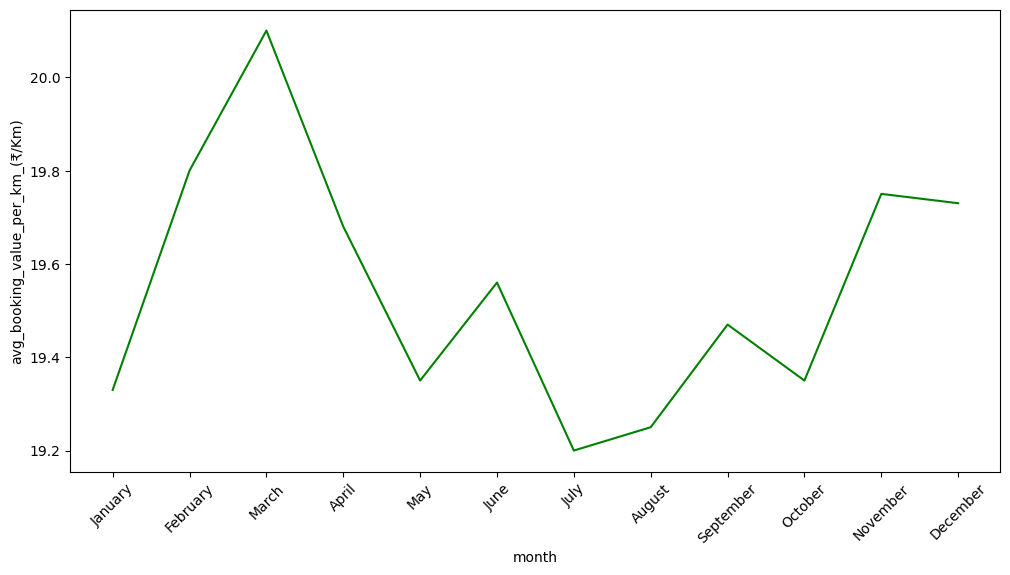

In [427]:
df_new = pd.DataFrame()
df_new[['date','booking_value','ride_distance']] = df[df['Booking Status']== 'Completed'][['Date','Booking Value','Ride Distance']].copy()
df_new['date'] = pd.to_datetime(df_new['date'])
df_new['month'] = df_new['date'].dt.month_name()
df_new['month_num'] = df_new['date'].dt.month
df_new= df_new.groupby(['month', 'month_num'], as_index= False)[['booking_value','ride_distance']].sum()
df_new['avg_booking_value_per_km_(₹/Km)'] = (df_new['booking_value'] / df_new['ride_distance']).round(2)
df_new= df_new.sort_values('month_num')

fig = plt.subplots(figsize=(12, 6))
plt.xticks(rotation=45)
sns.lineplot(data=df_new, x='month', y='avg_booking_value_per_km_(₹/Km)', color='green')

### some statistical sigmificat correlation is be found between avg_booking_value_per_km and ride_distance, indicating that our dynamic pricing algorithm might have a combination of a fixed + variable costing (the variable decreases with increase in ride distance)

In [355]:
df_new = pd.DataFrame()
df_new[['date','booking_value','ride_distance']] = df[df['Booking Status']== 'Completed'][['Date','Booking Value','Ride Distance']].copy()
df_new['date'] = pd.to_datetime(df_new['date'])
df_new['month'] = df_new['date'].dt.month_name()
df_new['month_num'] = df_new['date'].dt.month
df_new= df_new.groupby(['month', 'month_num'], as_index= False)[['booking_value','ride_distance']].sum()
df_new['avg_booking_value_per_km_(₹/Km)'] = (df_new['booking_value'] / df_new['ride_distance']).round(2)
df_new= df_new.sort_values('month_num')
df_new['avg_booking_value_per_km_(₹/Km)'].corr(df_new['ride_distance']).round(4)

np.float64(-0.2845)

## As can be seen in the plot, the distribution of gross booking value per month is rather constant and in the approx range of 3.8-4.2 * 10^6
### --> the ride count fell sharply in february which can be due to a sudden hike in the avg booking value/Km due to which total booking valur for the month also fell (should look out more for price sensitivity of the market) but then in March, the avg booking value/Km, total ride count as well as the total revenue grew (need to look at more data especially the data from prvious years to figure if i's something with this March or if it is a pattern we can exploit), post that we see that most of the times,the user market has reacted negatively to any hike in the average 
### --> during May to July, users did react to the increase or decrease in the avg booking value/Km according to the above findings but the total booking value remained more or less constant. 

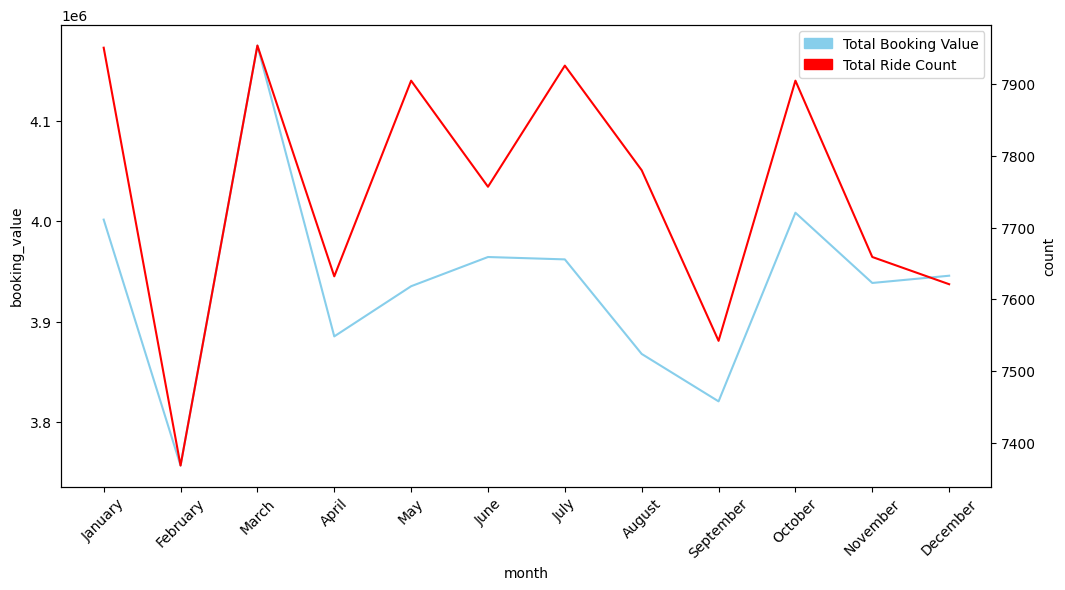

In [346]:
fig, ax1 = plt.subplots(figsize=(12, 6))
plt.xticks(rotation=45)
sns.lineplot(data= df_new, x='month', y= 'booking_value', ax=ax1, color='skyblue')

ax2 = ax1.twinx()
df_new = pd.DataFrame()
df_new[['date','booking_value']] = df[df['Booking Status']== 'Completed'][['Date','Booking Value']].copy()
df_new['date'] = pd.to_datetime(df_new['date'])
df_new['month'] = df_new['date'].dt.month_name()
df_new['month_num'] = df_new['date'].dt.month
df_new= df_new.groupby(['month', 'month_num']).size().reset_index(name='count').sort_values('month_num')
sns.lineplot(data= df_new, x='month', y= 'count', ax=ax2, color='red')
ax1_patch = mpatches.Patch(color='skyblue', label='Total Booking Value')
ax2_patch = mpatches.Patch(color='red', label='Total Ride Count')
ax1.legend(handles=[ax1_patch, ax2_patch])


## What payment channels do our users generally prefer and if has been any month-wise/vehicle-type trend in this preference?
### --> as is evident in the plots, the distribution is dominated by UPI followed by Cash and a very low percentage of users prefer Uber Wallet or Credit/Debit Cards which can majorly be due to convinience. We should incentivise our power users with additional discounts to encourage them to use uber wallet 

<Axes: xlabel='payment_method', ylabel='count'>

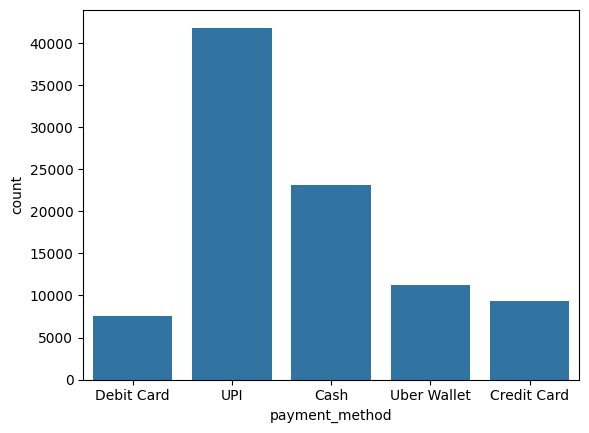

In [148]:
df_new = pd.DataFrame()
df_new[['date','payment_method']] = df[df['Booking Status']== 'Completed'][['Date','Payment Method']].copy()
sns.countplot(data=df_new, x='payment_method')

In [149]:
df_new['percentage'] = (df_new.groupby('payment_method')['payment_method'].transform('count') / len(df_new) * 100).round(2)
df_new = df_new.drop_duplicates(subset=['payment_method'])
df_new

,date,payment_method,percentage
2,2024-08-23,Debit Card,8.09
3,2024-10-21,UPI,44.98
10,2024-06-14,Cash,24.85
15,2024-06-07,Uber Wallet,12.05
25,2024-08-08,Credit Card,10.02


<Axes: xlabel='month', ylabel='count'>

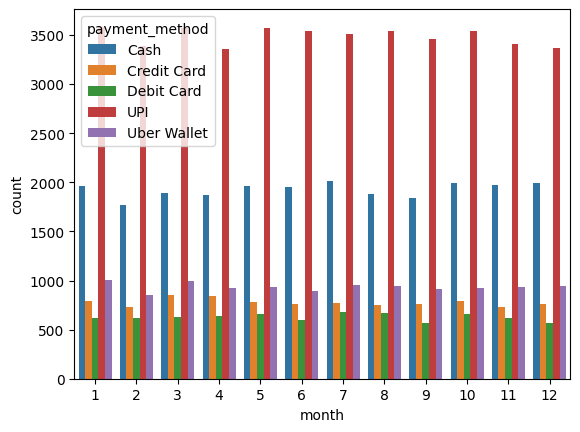

In [ ]:
df_new = pd.DataFrame()
df_new[['date','payment_method']] = df[df['Booking Status']== 'Completed'][['Date','Payment Method']].copy()
df_new['date'] = pd.to_datetime(df_new['date'])
df_new['month']= df_new['date'].dt.month
df_new = df_new.groupby(['month', 'payment_method']).size().reset_index(name='count')
sns.barplot(data= df_new, x='month', y= 'count',hue= 'payment_method')

<Axes: xlabel='vehicle_type', ylabel='count'>

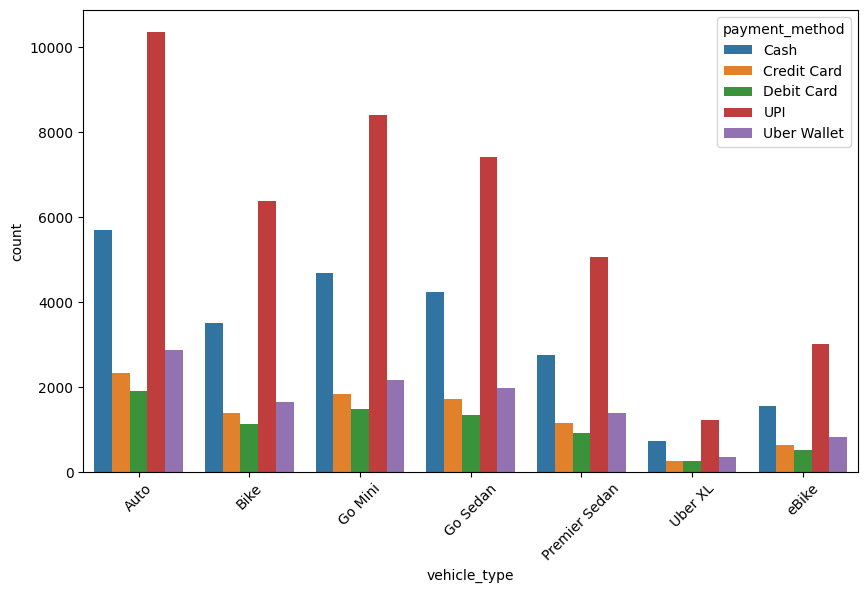

In [67]:
df_new = pd.DataFrame()
df_new[['vehicle_type','payment_method']] = df[df['Booking Status']== 'Completed'][['Vehicle Type','Payment Method']].copy()
df_new = df_new.groupby(['vehicle_type', 'payment_method']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
sns.barplot(data= df_new, x='vehicle_type', y= 'count',hue= 'payment_method')

## Time Bucket Based Analysis 
### • What time do we get the most ride requests or generate the most gross bookings? --> It can be seen and inferred that ride volume is minimum in the morning bucket grows significantly in the afternoon and till evening where its at it's peak and then dips a bit at night

/var/folders/_0/hs7xvst91jj0zw8xh1166jrc0000gn/T/ipykernel_67304/2285428411.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_new_count = df_new.groupby(['time_buckets']).size().reset_index(name='count')
/var/folders/_0/hs7xvst91jj0zw8xh1166jrc0000gn/T/ipykernel_67304/2285428411.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_new_sum = df_new.groupby(['time_buckets'])['Booking Value'].sum().reset_index(name='total_booking_value')


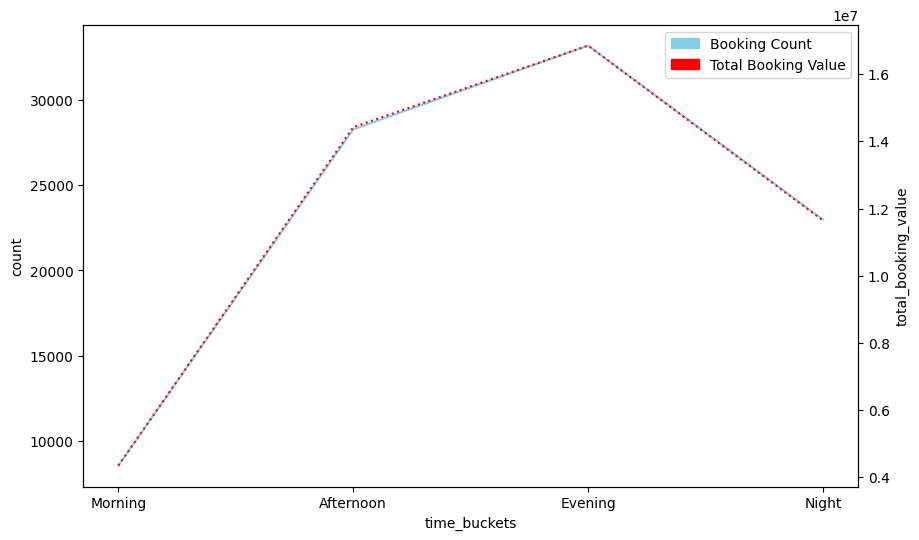

In [191]:
df_new = df[df['Booking Status']== 'Completed'].copy()
df_new['hour'] = df_new['Time'].str.split(':').str[0].astype(int)
bins = [-1, 6, 12, 18, 24]
labels = ['Morning', 'Afternoon', 'Evening', 'Night']
df_new['time_buckets'] = pd.cut(df_new['hour'], bins=bins, labels=labels)
df_new_count = df_new.groupby(['time_buckets']).size().reset_index(name='count')
df_new_sum = df_new.groupby(['time_buckets'])['Booking Value'].sum().reset_index(name='total_booking_value')
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_new_count, x='time_buckets', y='count', ax=ax1, color='skyblue')
ax2 = ax1.twinx()
sns.lineplot(data=df_new_sum, x='time_buckets', y='total_booking_value', ax=ax2, color='red', markers='o',linestyle=':')
ax1_patch = mpatches.Patch(color='skyblue', label='Booking Count')
ax2_patch = mpatches.Patch(color='red', label='Total Booking Value')
ax1.legend(handles=[ax1_patch, ax2_patch])

/var/folders/_0/hs7xvst91jj0zw8xh1166jrc0000gn/T/ipykernel_67304/443137353.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_new= df_new.groupby(['time_buckets','Vehicle Type']).size().rename('count').reset_index()


Text(0, 0.5, 'Count of Bookings')

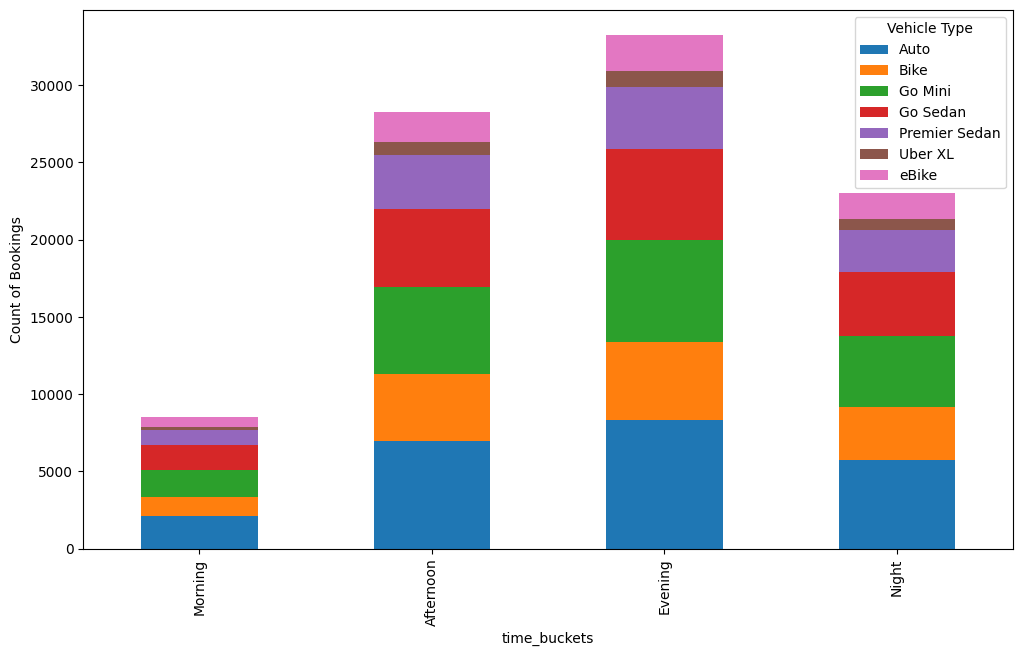

In [408]:
df_new = df[df['Booking Status'] == 'Completed'][['Booking Value', 'Ride Distance', 'Vehicle Type', 'Customer Rating', 'Time']].copy()
df_new.dropna(inplace=True)
df_new['booking_value per km (₹/Km)'] = (df_new['Booking Value'] / df_new['Ride Distance']).round(2)
df_new['hour'] = df_new['Time'].str.split(':').str[0].astype(int)
bins = [-1, 6, 12, 18, 24]
labels = ['Morning', 'Afternoon', 'Evening', 'Night']
df_new['time_buckets'] = pd.cut(df_new['hour'], bins=bins, labels=labels)
df_new= df_new.groupby(['time_buckets','Vehicle Type']).size().rename('count').reset_index()
df_pivot= df_new.pivot(index='time_buckets', columns='Vehicle Type', values='count').reset_index()
df_pivot= df_pivot.set_index('time_buckets')
df_pivot.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.ylabel('Count of Bookings')

## What were the major reasons behind drivers cancelling the rides?
#### --> it can be seen that there is no *major* reason for the drivers to cancel the rides as the distribution is pretty even and the bifurcation of cancelled rides wrt time buckets goes very well with our earlier time bucket analysis which shows that a major chunk of users use the app in the evening and a minor in the early morning bucket for which the distribution of cancelled rides also follows

In [308]:
(df['Driver Cancellation Reason'].value_counts(normalize=True)*100).round(2)

Driver Cancellation Reason
Customer related issue                 25.32
The customer was coughing/sick         25.00
Personal & Car related issues          24.91
More than permitted people in there    24.76
Name: proportion, dtype: float64

/var/folders/_0/hs7xvst91jj0zw8xh1166jrc0000gn/T/ipykernel_67304/893362601.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_new_count = df_new.groupby(['time_buckets','Driver Cancellation Reason']).size().reset_index(name='count')


<Axes: xlabel='time_buckets', ylabel='count'>

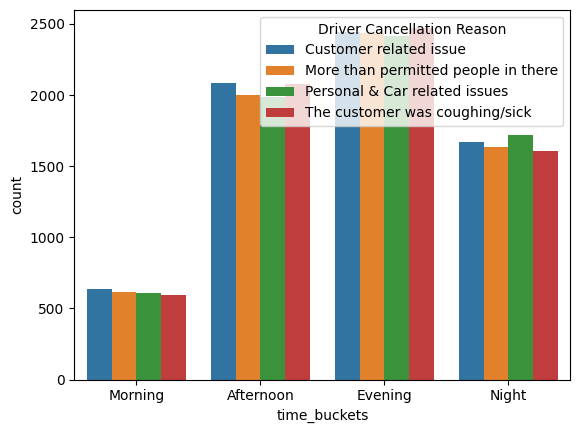

In [ ]:
df_new = df[df['Driver Cancellation Reason'].notna()].copy()
df_new['hour'] = df_new['Time'].str.split(':').str[0].astype(int)
bins = [-1, 6, 12, 18, 24]
labels = ['Morning', 'Afternoon', 'Evening', 'Night']
df_new['time_buckets'] = pd.cut(df_new['hour'], bins=bins, labels=labels)
df_new_count = df_new.groupby(['time_buckets','Driver Cancellation Reason']).size().reset_index(name='count')
sns.barplot(data=df_new_count, x='time_buckets', y='count', hue='Driver Cancellation Reason')

## What were the major reasons behind users cancelling the rides? (the time bucket distribution is similar to that of the drivers cancelling the rides which can be due to the dataset being synthetic)
### --> no inference due to equal distribution but AC not working is the least significant of the reasons 

In [304]:
(df['Reason for cancelling by Customer'].value_counts(normalize=True)*100).round(2)

Reason for cancelling by Customer
Wrong Address                                   22.50
Change of plans                                 22.41
Driver is not moving towards pickup location    22.24
Driver asked to cancel                          21.86
AC is not working                               11.00
Name: proportion, dtype: float64

## What were the major reasons behind the incomplete rides?
### --> the time bucket analysis and bifurcastion based on the vehicle type here again don't help us much due to the distribution being similar to the driver cancellation and user cancellation reasons analysis

<Axes: xlabel='month', ylabel='count'>

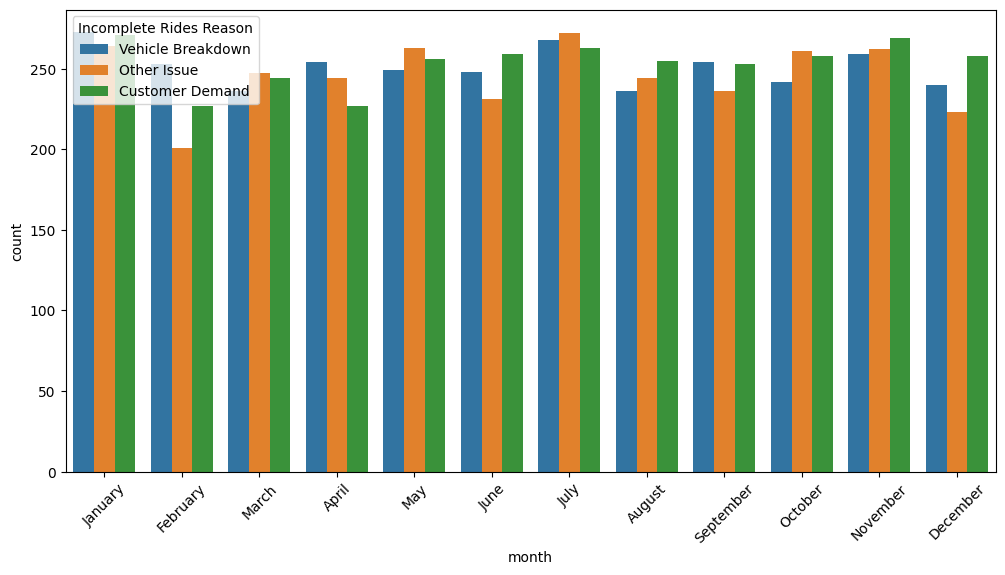

In [383]:
df_new = df[df['Incomplete Rides Reason'].notna()].copy()
df_new['Date'] = pd.to_datetime(df_new['Date'])
df_new['month'] = df_new['Date'].dt.month_name()
df_new['month_num'] = df_new['Date'].dt.month
df_new = df_new.groupby(['month', 'month_num', 'Incomplete Rides Reason'], as_index=False).size().rename(columns={'size': 'count'})
df_new= df_new.sort_values('month_num')
fig = plt.subplots(figsize=(12, 6))
plt.xticks(rotation=45)
sns.barplot(data=df_new, x='month', y='count', hue='Incomplete Rides Reason')

Vehicle Type
Auto             25.0
Go Mini          20.0
Go Sedan         18.0
Bike             15.0
Premier Sedan    12.0
eBike             7.0
Uber XL           3.0
Name: proportion, dtype: float64

## What is the average booking_value/Km for each Vehicle Type?
### • --> although the difference is not very significant but since Uber plays heavily on volume, the highest avg_booking_value_per_km is yielded by Go Sedan (~ ₹ 34.6) while the lowest is given by eBike (~₹ 32.4) and ~38.5% of the Go Sedan rides were 'not completed' we need to look into it especially  why the canceled the rides (18.5% of not completed go sedan rides) --> The driver cancellation reasons are distributed into perfectly uniform 25% quartiles.

<Axes: xlabel='Vehicle Type', ylabel='avg_booking_value_per_km'>

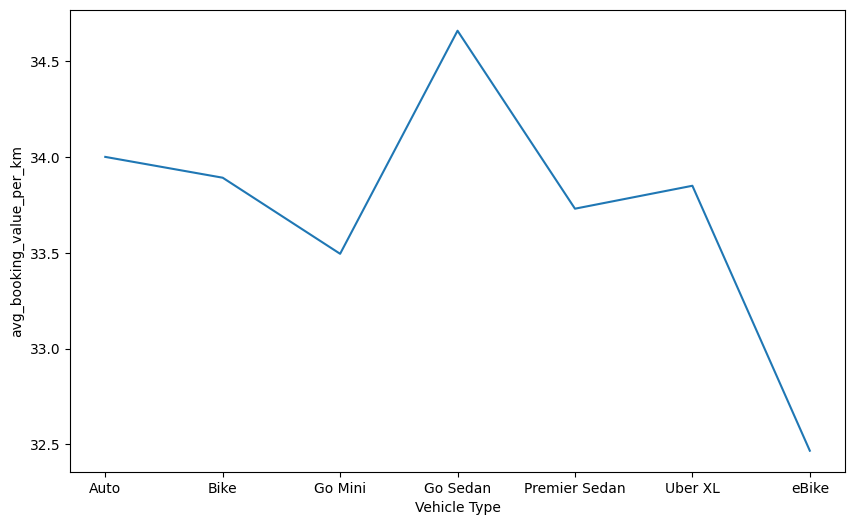

In [ ]:
df_new = df[df['Booking Status'] == 'Completed'][['Booking Value', 'Ride Distance', 'Vehicle Type', 'Customer Rating', 'Time']].copy()
df_new.dropna(inplace=True)
df_new['booking_value per km (₹/Km)'] = (df_new['Booking Value'] / df_new['Ride Distance']).round(2)
df_new = df_new.groupby('Vehicle Type')['booking_value per km (₹/Km)'].mean().reset_index(name='avg_booking_value_per_km')
fig = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_new, x='Vehicle Type', y='avg_booking_value_per_km')

In [305]:
df_new = df[df['Vehicle Type'] == 'Go Sedan'][['Booking Status', 'Ride Distance']].copy()
(df_new['Booking Status'].value_counts(normalize=True)*100).round(2)

Booking Status
Completed                61.44
Cancelled by Driver      18.54
No Driver Found           7.22
Cancelled by Customer     6.75
Incomplete                6.05
Name: proportion, dtype: float64

In [165]:
df_new = df[df['Vehicle Type'] == 'Go Sedan'][['Booking Status', 'Ride Distance','Driver Cancellation Reason']].copy()
(df_new['Driver Cancellation Reason'].value_counts(normalize=True)*100).round(2)

Driver Cancellation Reason
Customer related issue                 25.64
The customer was coughing/sick         25.00
More than permitted people in there    24.89
Personal & Car related issues          24.47
Name: proportion, dtype: float64

### It can be clearly seen that the value for positive outliers in avg_booking_value_per_km are the highest during the 'Morning' and the 'Night' buckets which suggests a high price fluctuation (positive) for those durations whie that of 'Evening' isn't that high enough and during 'Afternoon' the outliers can be seen out in both the directions of the whiskers.
### We should make the pricing in the morning more affordable to encourage users to use our app more.

/var/folders/_0/hs7xvst91jj0zw8xh1166jrc0000gn/T/ipykernel_15533/3335439016.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_new_count = df_new.groupby(['time_buckets','Vehicle Type'])['booking_value per km (₹/Km)'].mean().reset_index(name='avg_booking_value_per_km')


<Axes: xlabel='time_buckets', ylabel='avg_booking_value_per_km'>

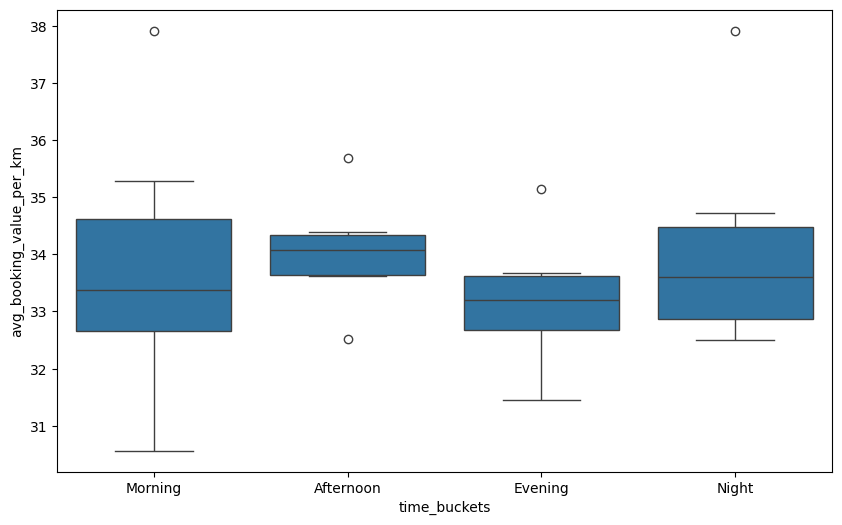

In [176]:
df_new = df[df['Booking Status'] == 'Completed'][['Booking Value', 'Ride Distance', 'Vehicle Type', 'Customer Rating', 'Time']].copy()
df_new.dropna(inplace=True)
df_new['booking_value per km (₹/Km)'] = (df_new['Booking Value'] / df_new['Ride Distance']).round(2)
df_new['hour'] = df_new['Time'].str.split(':').str[0].astype(int)
bins = [-1, 6, 12, 18, 24]
labels = ['Morning', 'Afternoon', 'Evening', 'Night']
df_new['time_buckets'] = pd.cut(df_new['hour'], bins=bins, labels=labels)
df_new_count = df_new.groupby(['time_buckets','Vehicle Type'])['booking_value per km (₹/Km)'].mean().reset_index(name='avg_booking_value_per_km')
plt.figure(figsize=(10, 6)) 
sns.boxplot(data=df_new_count, x='time_buckets', y='avg_booking_value_per_km')

In [163]:
df_new = df[df['Booking Status'] == 'Completed'][['Booking Value', 'Ride Distance', 'Vehicle Type', 'Customer Rating', 'Time']].copy()
df_new.dropna(inplace=True)
df_new['booking_value per km (₹/Km)'] = (df_new['Booking Value'] / df_new['Ride Distance']).round(2)
df_new['hour'] = df_new['Time'].str.split(':').str[0].astype(int)
bins = [-1, 6, 12, 18, 24]
labels = ['Morning', 'Afternoon', 'Evening', 'Night']
df_new['time_buckets'] = pd.cut(df_new['hour'], bins=bins, labels=labels)
df_new_count = df_new.groupby(['time_buckets'])['booking_value per km (₹/Km)'].median().reset_index(name='avg_booking_value_per_km')
df_new_count

/var/folders/_0/hs7xvst91jj0zw8xh1166jrc0000gn/T/ipykernel_15533/3553073062.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_new_count = df_new.groupby(['time_buckets'])['booking_value per km (₹/Km)'].median().reset_index(name='avg_booking_value_per_km')


,time_buckets,avg_booking_value_per_km
0,Morning,17.23
1,Afternoon,17.92
2,Evening,17.65
3,Night,17.67


## Location Bracket Analysis
### we'll use google and gemini a bit for classifying the locations into parts of NCR for better analysis

In [444]:
df_loc = pd.concat([df['Pickup Location'], df['Drop Location']], ignore_index=True).drop_duplicates()
pd.set_option('display.max_rows', None) 
print(df_loc.head(len(df_loc)))


0                     Palam Vihar
1                   Shastri Nagar
2                         Khandsa
3             Central Secretariat
4                Ghitorni Village
5                           AIIMS
6                        Vaishali
7                     Mayur Vihar
8                 Noida Sector 62
9                          Rohini
10                   Udyog Bhawan
11                   Vidhan Sabha
12                    Patel Chowk
13                  Malviya Nagar
14                        Madipur
15                    Jama Masjid
16                    IGI Airport
17                     Vinobapuri
18                  Kashmere Gate
19                      Pitampura
20                   Punjabi Bagh
21                  Greater Noida
22                     Tis Hazari
23                Noida Sector 18
24                 Kanhaiya Nagar
25                          Okhla
26                      Cyber Hub
27            Sadar Bazar Gurgaon
28                   Shastri Park
29            

In [3]:
location_groups = {
    "Central Delhi": [
        "Central Secretariat", "Udyog Bhawan", "Patel Chowk", "Mandi House", 
        "Khan Market", "Pragati Maidan", "India Gate", "Barakhamba Road", 
        "Rajiv Chowk", "Connaught Place", "Lok Kalyan Marg", "Chanakyapuri", 
        "ITO", "Indraprastha", "Jor Bagh"
    ],
    
    "South Delhi": [
        "AIIMS", "Malviya Nagar", "Vinobapuri", "Moolchand", "INA Market", 
        "IIT Delhi", "Munirka", "IGNOU Road", "Hauz Rani", "Maidan Garhi", 
        "Saket", "Greater Kailash", "Sarojini Nagar", "Panchsheel Park", 
        "South Extension", "Chirag Delhi", "Green Park", "Hauz Khas", 
        "Bhikaji Cama Place", "RK Puram", "Vasant Kunj", "Saket A Block", 
        "Saidulajab", "Chhatarpur", "Sultanpur", "Aya Nagar", "Ghitorni", 
        "Ghitorni Village", "Arjangarh", "Qutub Minar", "Lajpat Nagar", "Mehrauli"
    ],
    
    "Gurgaon - New City": [
        "Cyber Hub", "DLF City Court", "MG Road", "Ardee City", "Sushant Lok", 
        "Sikanderpur", "DLF Phase 3", "Huda City Centre", "Golf Course Road", 
        "Ambience Mall", "Gurgaon Sector 29", "Gurgaon Sector 56"
    ],
    
    "Gurgaon - Old City & Industrial": [
        "Palam Vihar", "Khandsa", "Sadar Bazar Gurgaon", "Civil Lines Gurgaon", 
        "Rajiv Nagar", "Sohna Road", "IMT Manesar", "Kherki Daula Toll", 
        "IFFCO Chowk", "Basai Dhankot", "Udyog Vihar Phase 4", "Udyog Vihar", 
        "Narsinghpur", "Pataudi Chowk", "Hero Honda Chowk", "Badshahpur", 
        "Subhash Chowk", "Old Gurgaon", "Gurgaon Railway Station", "Vatika Chowk", 
        "Kadarpur", "New Colony"
    ],
    
    "Noida & Greater Noida": [
        "Noida Sector 62", "Noida Sector 18", "Noida Extension", "Noida Film City", 
        "Botanical Garden", "Greater Noida"
    ],
    
    "West Delhi": [
        "Madipur", "Punjabi Bagh", "Kanhaiya Nagar", "Dwarka Mor", "Uttam Nagar", 
        "Nawada", "Tilak Nagar", "Ramesh Nagar", "Dwarka Sector 21", "Tagore Garden", 
        "Janakpuri", "Rajouri Garden", "Kirti Nagar", "Subhash Nagar", "Paschim Vihar", 
        "Moti Nagar", "Mundka", "Peeragarhi", "Satguru Ram Singh Marg", "Shivaji Park", 
        "Ashok Park Main"
    ],
    
    "North & North-West Delhi": [
        "Shastri Nagar", "Rohini", "Pitampura", "Adarsh Nagar", "Model Town", 
        "Azadpur", "Rohini West", "Vishwavidyalaya", "Samaypur Badli", "Jahangirpuri", 
        "Netaji Subhash Place", "Ashok Vihar", "Rohini East", "GTB Nagar", 
        "Vidhan Sabha", "Rithala"
    ],
    
    "East Delhi & Ghaziabad": [
        "Mayur Vihar", "Vaishali", "Nirman Vihar", "Anand Vihar ISBT", "Karkarduma", 
        "Anand Vihar", "Yamuna Bank", "Laxmi Nagar", "Akshardham", "Preet Vihar", 
        "Indirapuram", "Kaushambi", "Ghaziabad", "Dilshad Garden", "Jhilmil", 
        "Mansarovar Park", "Shahdara", "Welcome", "Seelampur", "Shastri Park"
    ],
    
    "Old Delhi & North-Central": [
        "Jama Masjid", "Kashmere Gate", "Tis Hazari", "New Delhi Railway Station", 
        "Karol Bagh", "Kashmere Gate ISBT", "Delhi Gate", "Chandni Chowk", "Lal Quila", 
        "Pulbangash", "Inderlok", "Paharganj", "Keshav Puram"
    ],
    
    "Peripheral & Satellite Towns": [
        "IGI Airport", "Tughlakabad", "Badarpur", "Okhla", "Jasola", "Kalkaji", 
        "Govindpuri", "Nehru Place", "Ashram", "Faridabad Sector 15", "Bahadurgarh", 
        "Sonipat", "Panipat", "Meerut", "Bhiwadi", "Manesar", "Raj Nagar Extension", 
        "Gwal Pahari", "Sarai Kale Khan"
    ]
}

reversed_dict = {location: region for region, locations in location_groups.items() for location in locations}
df['pickup_region'] = df['Pickup Location'].map(reversed_dict)
df['drop_region'] = df['Drop Location'].map(reversed_dict)

In [63]:
df_new = df[['Booking Status','pickup_region']].copy()
cnt = len(df_new)
df_new= df_new.groupby(['pickup_region']).size().reset_index(name='count')
df_new['percentage'] = (df_new['count']/cnt).round(2)*100
df_new.sort_values('percentage', ascending=False)

,pickup_region,count,percentage
8,South Delhi,27160,18.0
3,Gurgaon - Old City & Industrial,18863,13.0
9,West Delhi,18126,12.0
1,East Delhi & Ghaziabad,16821,11.0
7,Peripheral & Satellite Towns,16125,11.0
0,Central Delhi,12929,9.0
5,North & North-West Delhi,13692,9.0
2,Gurgaon - New City,10152,7.0
6,Old Delhi & North-Central,11060,7.0
4,Noida & Greater Noida,5072,3.0


<Axes: xlabel='pickup_region', ylabel='percentage'>

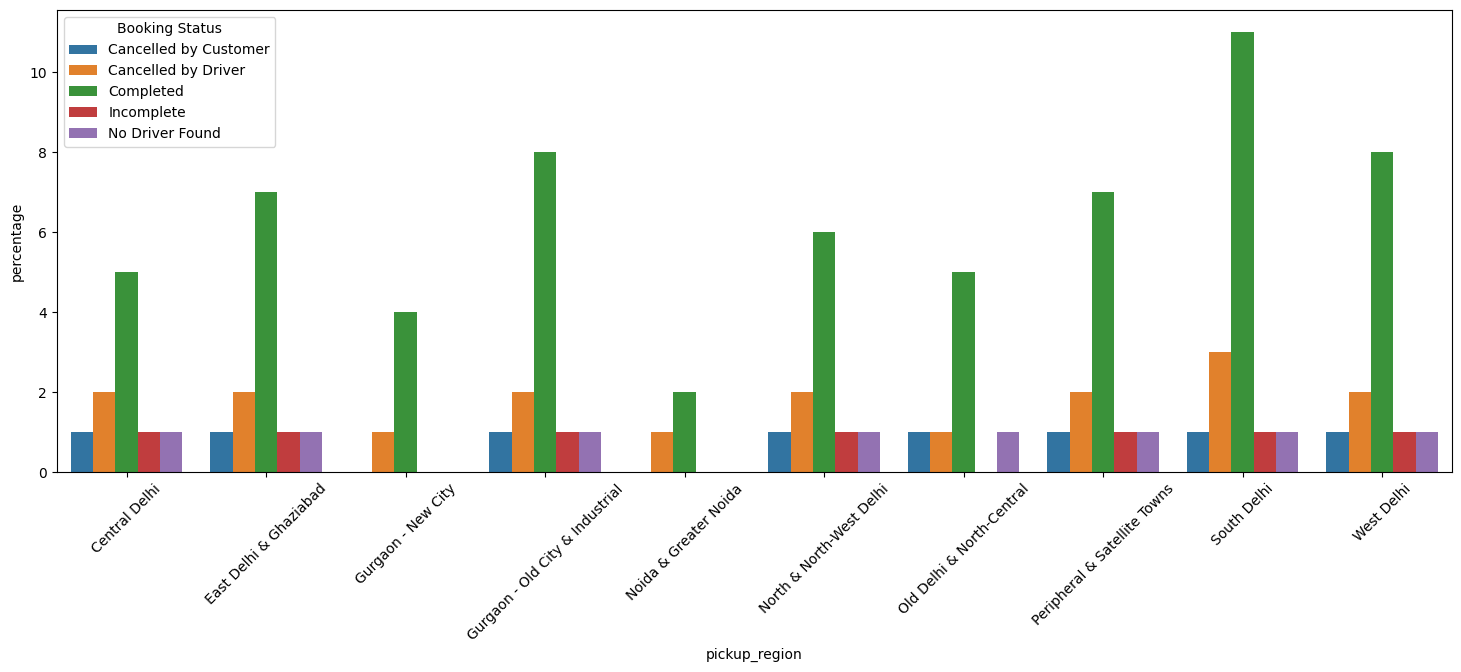

In [65]:
df_new = df[['Booking Status','pickup_region']].copy()
df_new= df_new.groupby(['pickup_region','Booking Status']).size().reset_index(name='count')
df_new['percentage'] = (df_new['count']/cnt).round(2)*100
df_new= df_new.dropna().sort_values('pickup_region')
fig = plt.subplots(figsize=(18, 6))
plt.xticks(rotation=45)
sns.barplot(data=df_new, x='pickup_region',y='percentage', hue='Booking Status')

In [67]:
df_new = df[['Booking Status','drop_region']].copy()
cnt = len(df_new)
df_new= df_new.groupby(['drop_region']).size().reset_index(name='count')
df_new['percentage'] = (df_new['count']/cnt).round(2)*100
df_new.sort_values('percentage', ascending=False)

,drop_region,count,percentage
8,South Delhi,27267,18.0
3,Gurgaon - Old City & Industrial,18737,12.0
9,West Delhi,17936,12.0
1,East Delhi & Ghaziabad,16975,11.0
7,Peripheral & Satellite Towns,16209,11.0
5,North & North-West Delhi,13747,9.0
0,Central Delhi,12662,8.0
2,Gurgaon - New City,10182,7.0
6,Old Delhi & North-Central,11099,7.0
4,Noida & Greater Noida,5186,3.0


<Axes: xlabel='drop_region', ylabel='percentage'>

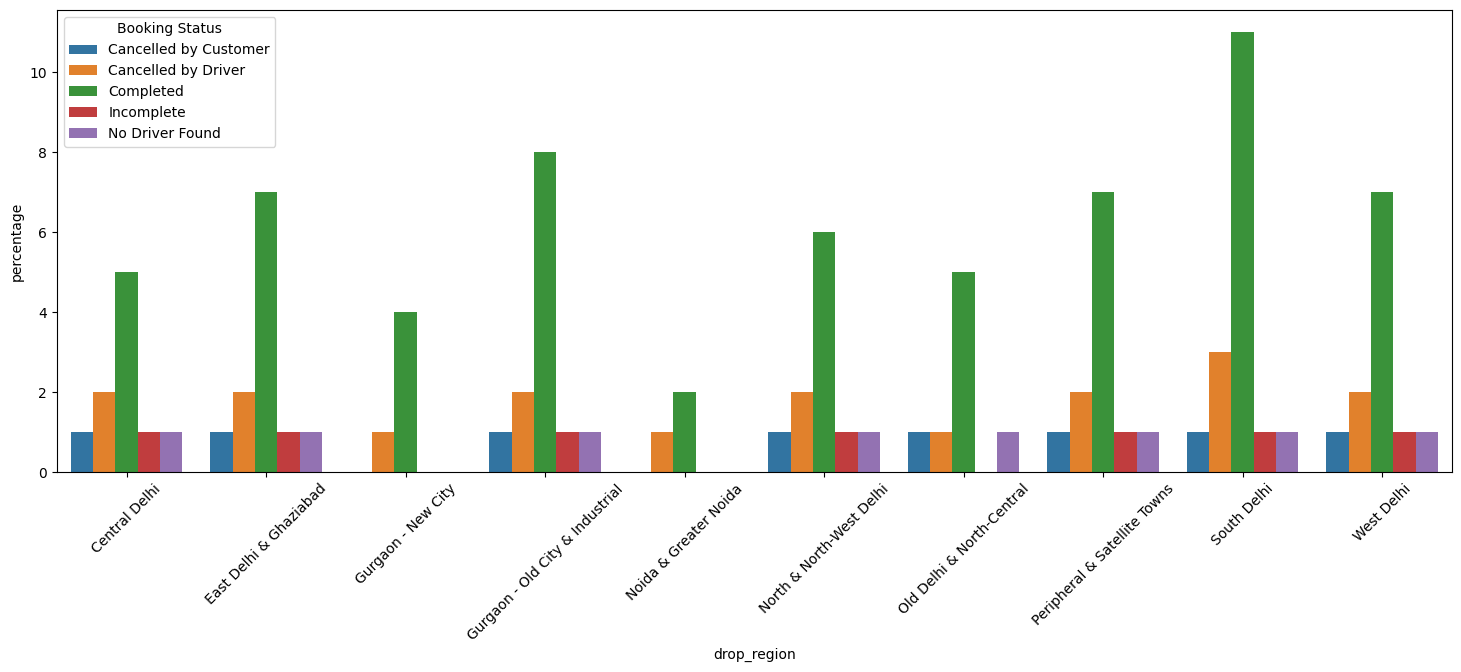

In [68]:
df_new = df[['Booking Status','drop_region']].copy()
df_new= df_new.groupby(['drop_region','Booking Status']).size().reset_index(name='count')
df_new['percentage'] = (df_new['count']/cnt).round(2)*100
df_new= df_new.dropna().sort_values('drop_region')
fig = plt.subplots(figsize=(18, 6))
plt.xticks(rotation=45)
sns.barplot(data=df_new, x='drop_region',y='percentage', hue='Booking Status')

### *South Delhi - South Delhi*,  *South Delhi - Gurgaon (Old City)*,  *South Delhi - West Delhi*, *South Delhi - East Delhi & Ghaziabad* and  *South Delhi - Peripheral & Satellite Towns* are the most used routes for the ncr region in the respective order

In [74]:
df_new = df[['pickup_region','drop_region']].copy()
df_new.dropna(inplace=True)
df_new = df_new.groupby(['pickup_region','drop_region']).size().reset_index(name='count').sort_values('count', ascending=False)
df_new.head(10)

,pickup_region,drop_region,count
88,South Delhi,South Delhi,4807
38,Gurgaon - Old City & Industrial,South Delhi,3452
83,South Delhi,Gurgaon - Old City & Industrial,3430
98,West Delhi,South Delhi,3302
89,South Delhi,West Delhi,3149
18,East Delhi & Ghaziabad,South Delhi,3098
81,South Delhi,East Delhi & Ghaziabad,3069
87,South Delhi,Peripheral & Satellite Towns,3035
78,Peripheral & Satellite Towns,South Delhi,2998
85,South Delhi,North & North-West Delhi,2477


### checking avg_booking_value/Km by pickup and drop regions
--> *Noida & Greater Noida -	Gurgaon - New City, Noida & Greater Noida - Noida & Greater Noida, Noida & Greater Noida - Gurgaon - Old City & Industrial48	Noida & Greater Noida - South Delhi , Noida & Greater Noida -	East Delhi & Ghaziabad, West Delhi - North & North-West Delhi, Noida & Greater Noida	Peripheral & Satellite Towns, East Delhi & Ghaziabad- East Delhi & Ghaziabad ,Gurgaon - New City - Noida & Greater Noida, Gurgaon - Old City & Industrial - South Delhi* are the routes with the highest avg_booking_value_per_km (₹/Km) in the respective order


In [89]:
df_new = df[['pickup_region','drop_region','Booking Value', 'Ride Distance']].copy()
df_new = df_new.dropna()
df_new['booking_value per km (₹/Km)'] = (df_new['Booking Value'] / df_new['Ride Distance']).round(2)
df_new= df_new.groupby(['pickup_region','drop_region'])['booking_value per km (₹/Km)'].mean().round(2).reset_index(name='avg_booking_value_per_km(₹/Km)').sort_values('avg_booking_value_per_km(₹/Km)', ascending=False)
df_new.head(10)

,pickup_region,drop_region,avg_booking_value_per_km(₹/Km)
42,Noida & Greater Noida,Gurgaon - New City,47.43
44,Noida & Greater Noida,Noida & Greater Noida,44.91
43,Noida & Greater Noida,Gurgaon - Old City & Industrial,44.09
48,Noida & Greater Noida,South Delhi,43.48
41,Noida & Greater Noida,East Delhi & Ghaziabad,42.91
95,West Delhi,North & North-West Delhi,42.78
47,Noida & Greater Noida,Peripheral & Satellite Towns,42.47
11,East Delhi & Ghaziabad,East Delhi & Ghaziabad,41.25
24,Gurgaon - New City,Noida & Greater Noida,40.98
38,Gurgaon - Old City & Industrial,South Delhi,40.88


### checking ride_count by pickup and time buckets

/var/folders/_0/hs7xvst91jj0zw8xh1166jrc0000gn/T/ipykernel_15533/2485270259.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_new_count = df_new.groupby(['time_buckets','pickup_region']).size().reset_index(name='ride_count')


<Axes: xlabel='pickup_region', ylabel='ride_count'>

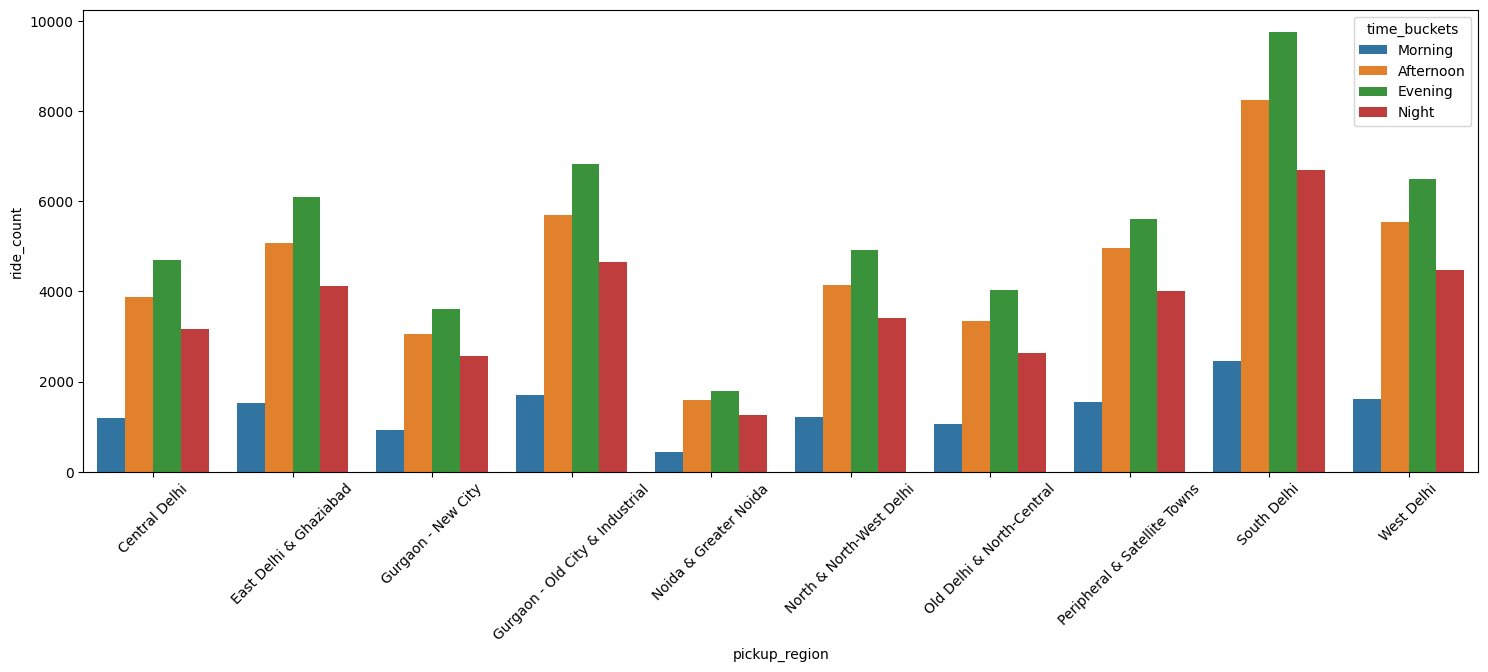

In [93]:
df_new = df[['pickup_region','Time']].copy()
df_new = df_new.dropna()
df_new['hour'] = df_new['Time'].str.split(':').str[0].astype(int)
bins = [-1, 6, 12, 18, 24]
labels = ['Morning', 'Afternoon', 'Evening', 'Night']
df_new['time_buckets'] = pd.cut(df_new['hour'], bins=bins, labels=labels)
df_new_count = df_new.groupby(['time_buckets','pickup_region']).size().reset_index(name='ride_count')
fig = plt.subplots(figsize=(18, 6))
plt.xticks(rotation=45)
sns.barplot(data=df_new_count, x='pickup_region', y='ride_count', hue='time_buckets')

## Driver Ratings Vs Ride Count
### we see a majority of the users had given their drivers a rating > 4, which is a good thing ==> they were satisfied with the ride

<Axes: xlabel='Driver Ratings', ylabel='ride_count'>

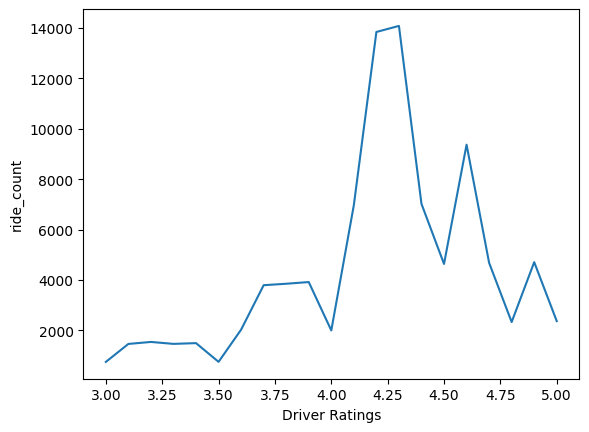

In [109]:
df_new = df[['Driver Ratings']].copy()
df_new.dropna(inplace=True)
df_new = df_new.groupby('Driver Ratings').size().rename('ride_count').reset_index().sort_values('Driver Ratings')
sns.lineplot(data=df_new, x='Driver Ratings', y= 'ride_count')

## User Cohort Analysis

### Here we have a list of power users

In [150]:
df_new= df[df['Booking Status'] == 'Completed'][['Customer ID', 'Date']].copy()
df_new['Date'] = pd.to_datetime(df_new['Date']).dt.date
df_new['First_Date'] = df_new.groupby('Customer ID')['Date'].transform('min')
df_new['ride_count'] = df_new.groupby('Customer ID')['Date'].transform('count')
df_new.sort_values('ride_count', ascending=False).head(10)

,Customer ID,Date,First_Date,ride_count
131912,"""CID8727691""",2024-07-13,2024-02-08,3
12256,"""CID7828101""",2024-04-30,2024-04-30,3
6647,"""CID4523979""",2024-01-31,2024-01-31,3
87708,"""CID8727691""",2024-02-08,2024-02-08,3
147129,"""CID8727691""",2024-12-02,2024-02-08,3
70541,"""CID4523979""",2024-04-22,2024-01-31,3
107104,"""CID4523979""",2024-02-26,2024-01-31,3
4315,"""CID7828101""",2024-06-12,2024-04-30,3
47583,"""CID7828101""",2024-07-06,2024-04-30,3
83089,"""CID3806914""",2024-11-27,2024-01-11,2


### average ride count w.r.t. the month difference shows us that not much people take multiple rides in the month of their first ride but the average rises to 2 in the subsequent months

<Axes: xlabel='month_diff', ylabel='avg_ride_count'>

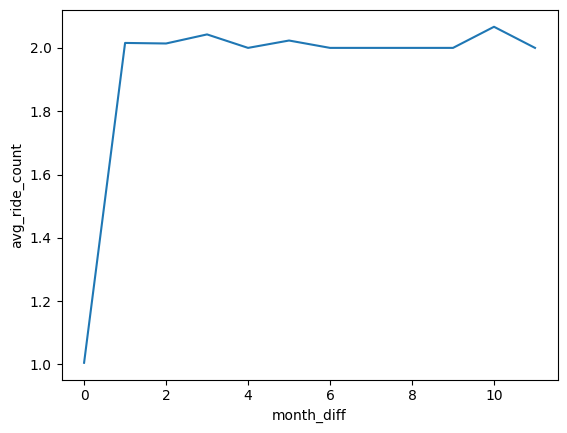

In [151]:
df_new['month'] = pd.to_datetime(df_new['Date']).dt.month
df_new['first_month'] = pd.to_datetime(df_new['First_Date']).dt.month
df_new['month_diff'] = df_new['month'] - df_new['first_month']
df_new = df_new.drop(columns=['month', 'first_month', 'Date', 'First_Date'])
df_new = df_new.groupby('month_diff')['ride_count'].mean().reset_index(name='avg_ride_count')
sns.lineplot(data=df_new, x='month_diff', y='avg_ride_count')

### we have a high percentage, i.e. about 38.4% of users whose first ride was not completed 

In [159]:
df_new= df[['Customer ID', 'Date', 'Booking Status']].copy()
df_new['Date'] = pd.to_datetime(df_new['Date']).dt.date
df_new['First_Date'] = df_new.groupby('Customer ID')['Date'].transform('min')
df_new['first_ride_was_not_completed'] = df_new.groupby('Customer ID')['Booking Status'].transform(lambda x: (x != 'Completed').sum() > 0)
df_new['first_month'] = pd.to_datetime(df_new['First_Date']).dt.month
df_new.drop(columns= ['Date','Booking Status','first_month','First_Date'], inplace=True)
df_new= df_new.groupby('first_ride_was_not_completed')['Customer ID'].size().reset_index(name='customer_count')
df_new['percentage'] = (df_new['customer_count'] / df_new['customer_count'].sum() * 100).round(2)
df_new


,first_ride_was_not_completed,customer_count,percentage
0,False,92417,61.61
1,True,57583,38.39


### there isn't much difference between average ride count of people whose first ride was completed to the ones whose first ride wasn't completed but we can't infer anything from this since the synthetic data is very skewed with the users having only 1 ride count

In [157]:
df_new= df[['Customer ID', 'Date', 'Booking Status']].copy()
df_new['Date'] = pd.to_datetime(df_new['Date']).dt.date
df_new['First_Date'] = df_new.groupby('Customer ID')['Date'].transform('min')
df_new['first_ride_was_not_completed'] = df_new.groupby('Customer ID')['Booking Status'].transform(lambda x: (x != 'Completed').sum() > 0)
df_new['first_month'] = pd.to_datetime(df_new['First_Date']).dt.month
df_new['ride_count'] = df_new.groupby('Customer ID')['Date'].transform('count')
df_new.drop(columns= ['Date','Booking Status','first_month','First_Date'], inplace=True)
df_new.groupby('first_ride_was_not_completed')['ride_count'].mean().reset_index(name='avg_ride_count')

,first_ride_was_not_completed,avg_ride_count
0,False,1.009847
1,True,1.026501
